<a href="https://colab.research.google.com/github/hiya906/my-machine-learning/blob/master/word2vec_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Install Library

In [3]:
import nltk
nltk.download("all")
tokenizer=nltk.data.load('tokenizers/punkt/english.pickle')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

In [221]:
import pandas as pd
from nltk.corpus import stopwords
import re
from gensim.models import Word2Vec
import numpy as np
import xgboost
import BeautifulSoup

ModuleNotFoundError: ignored

##2. Data Load

In [10]:
train = pd.read_csv('sample_data/train.csv')
test = pd.read_csv('sample_data/test.csv')

print(train)

                 tweet_id  ...                user_timezone
0      569753797704024065  ...                          NaN
1      569603156927246336  ...   Eastern Time (US & Canada)
2      569564566272811008  ...   Eastern Time (US & Canada)
3      570296986827694080  ...  Mountain Time (US & Canada)
4      569376145000390656  ...                          NaN
5      570044554130423808  ...   Central Time (US & Canada)
6      568629791869394945  ...   Eastern Time (US & Canada)
7      569605022197153792  ...                          NaN
8      567768224607911936  ...                          NaN
9      567663136082513920  ...                       London
10     568920244691070976  ...                          NaN
11     569674356915347456  ...   Eastern Time (US & Canada)
12     568104907384832000  ...   Eastern Time (US & Canada)
13     570267592478191617  ...   Central Time (US & Canada)
14     569667675603009537  ...                          NaN
15     570011200613806082  ...          

## 3. 데이터 개수 확인하기

In [11]:
a = train["airline_sentiment"].to_list()
index, count = np.unique(a, return_counts=True)
print(index)
print(count)

b = test["airline_sentiment"].to_list()
index, count = np.unique(b, return_counts=True)
print(index)
print(count)

['negative' 'neutral' 'positive']
[8254 2797 2125]
['negative' 'neutral' 'positive']
[924 302 238]



## 4. 데이터 시각화하기

(13176,)


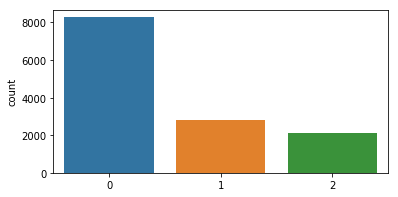

In [12]:
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

le = preprocessing.LabelEncoder()
seniment_num = le.fit_transform(train["airline_sentiment"]) # Label에 자동으로 알아서 번호 매겨줌
print(seniment_num.shape)

fig, e = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(seniment_num)

## 5. Tweet 길이에 대한 통계값

In [16]:
train_length = train["text"].apply(len)

print('트윗 길이 최대값: {}'.format(np.max(train_length)))
print('트윗 길이 평균값: {}'.format(np.mean(train_length)))
print('트윗 길이 표준편차: {}'.format(np.std(train_length)))
print('트윗 길이 중간값: {}'.format(np.median(train_length)))
print('트윗 길이 제1사분위: {}'.format(np.percentile(train_length, 25)))
print('트윗 길이 제3사분위: {}'.format(np.percentile(train_length, 75)))

트윗 길이 최대값: 186
트윗 길이 평균값: 103.71174863387978
트윗 길이 표준편차: 36.29367249847811
트윗 길이 중간값: 114.0
트윗 길이 제1사분위: 77.0
트윗 길이 제3사분위: 136.0


## 6. 데이터 Word Cloud로 표현해보기

(-0.5, 799.5, 599.5, -0.5)

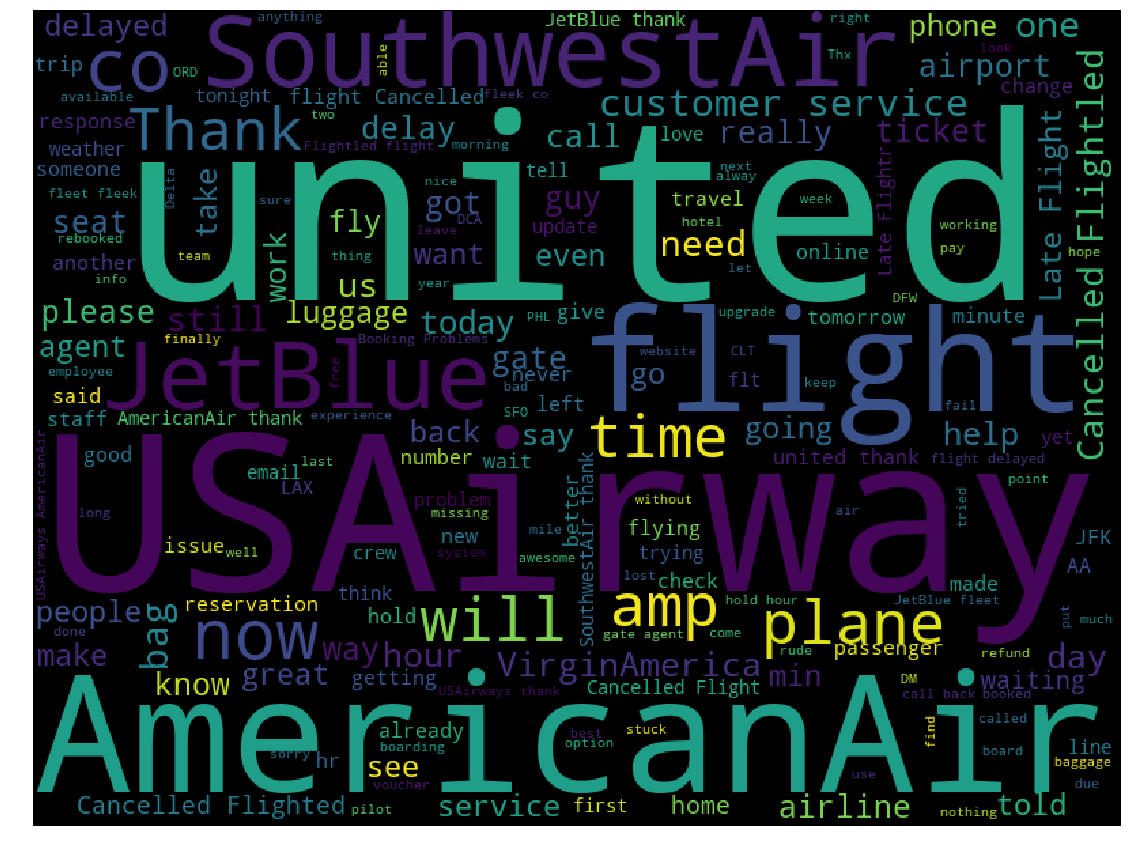

In [17]:
cloud = WordCloud(width=800, height=600).generate(" ".join(train["text"].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

##7. Tweet 길이에 따른 분포표 그리기

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Probability')

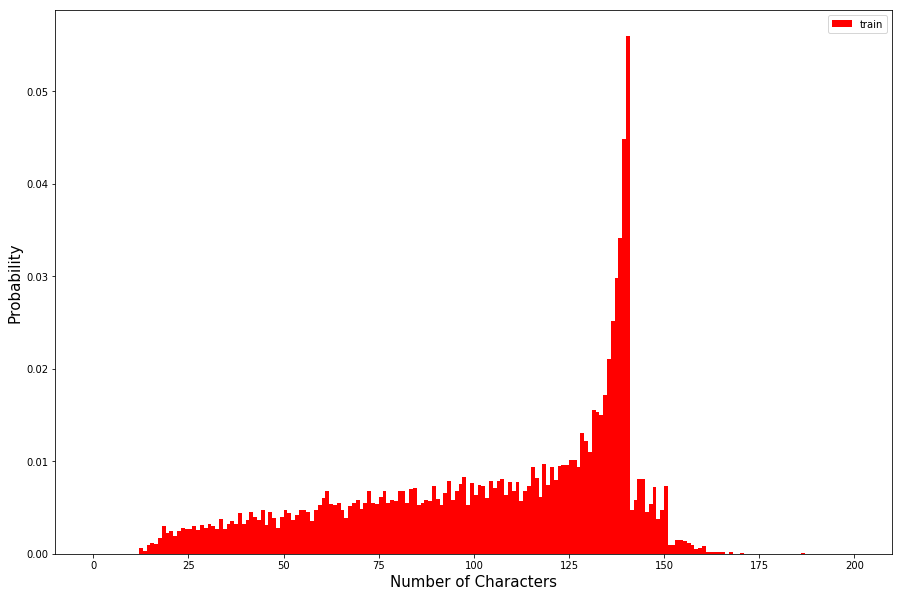

In [18]:
train_length = train["text"].apply(len)
plt.figure(figsize=(15,10))
plt.hist(train_length, bins=200, range=[0, 200], facecolor='r', normed=True, label='train')
plt.legend()
plt.xlabel('Number of Characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

## 8. 문장을 토큰으로 분리하기 (word2vec 사용)

In [0]:
from nltk.tokenize import TweetTokenizer
# from nltk.tokenize import word_tokenize
# def tokenize_row(row):
# #     row["text"] = word_tokenize(row["text"])
# #     row["tokenized_text"] = [] + row["text"]
#     row["tokenized_text"] = word_tokenize(row["text"])
#     return row
def tokenize_row(row):
  tknzr = TweetTokenizer(reduce_len=True)
  row["tokenized_text"] = tknzr.tokenize(row["text"])
  return row

In [72]:
# train_list=train['text'].to_list()
# for i in range(0, len(train_list)):
#   print(train_list[i])
train = train.apply(tokenize_row, axis=1)
test = test.apply(tokenize_row, axis=1)
print(train.shape)
print(test.shape)

(13176, 16)
(1464, 16)


In [238]:
total_moment = []
for i in train["tokenized_text"]:
  total_moment.append(i)
  
for i in test["tokenized_text"]:
  total_moment.append(i)
  
print(total_moment)
word2vec_model = Word2Vec(train["tokenized_text"], size=300, window=3)
EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz'
word2vec_model.intersect_word2vec_format(fname=EMBEDDING_FILE, binary=True)

#word2vec_model = Word2Vec(total_moment, size=512)
# word2vec_model = Word2Vec(train["tokenized_text"], size=512)
print(word2vec_model.wv.vocab)

[['@united', 'Yes', 'I', 'did', '.', 'We', 'headed', 'out', 'to', 'de-ice', '5', 'minutes', 'after', 'I', 'sent', 'it', 'to', 'you', '.', 'Made', 'it', 'to', 'Austin', ',', 'but', 'am', 'now', 'waiting', 'for', 'the', 'luggage', '.'], ['@AmericanAir', 'missing', 'a', 'full', 'days', 'of', 'work', 'thanks', 'guys'], ['@USAirways', 'your', 'mobile', 'app', 'is', 'horrible', '!', 'Needs', 'a', 'major', 'overhaul'], ['@AmericanAir', 'Checked', 'in', 'on', 'app', 'since', 'yesterday', '.', 'Confirmed', 'upgrade', '&', 'carry', 'on', ',', 'got', 'to', 'counter', '&', 'manager', 'upgraded', 'somebody', 'else', 'on', 'my', 'seat', '!'], ['@united', 'we', 'have', 'tried', 'to', 'change', 'our', 'flight', 'THREE', 'times', 'on', 'the', 'phone', 'and', 'got', 'disconnected', 'each', 'time', '.'], ['Decisions', 'Decisions', '@MandarinJourney', '@united', ':', "We'd", 'love', 'for', 'you', 'to', 'try', 'our', 'service', '.', 'We', 'offer', 'status', 'match', 'too', '.', 'http://t.co/xbQqqbRgVF', '^

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


{'@united': <gensim.models.keyedvectors.Vocab object at 0x7fdac118eef0>, 'Yes': <gensim.models.keyedvectors.Vocab object at 0x7fdac118eb38>, 'I': <gensim.models.keyedvectors.Vocab object at 0x7fdabe267b70>, 'did': <gensim.models.keyedvectors.Vocab object at 0x7fdac10cac18>, '.': <gensim.models.keyedvectors.Vocab object at 0x7fdac1c89358>, 'We': <gensim.models.keyedvectors.Vocab object at 0x7fdac11922e8>, 'headed': <gensim.models.keyedvectors.Vocab object at 0x7fdac1192390>, 'out': <gensim.models.keyedvectors.Vocab object at 0x7fdac11923c8>, 'to': <gensim.models.keyedvectors.Vocab object at 0x7fdac1192400>, 'de-ice': <gensim.models.keyedvectors.Vocab object at 0x7fdac1192438>, '5': <gensim.models.keyedvectors.Vocab object at 0x7fdac1192470>, 'minutes': <gensim.models.keyedvectors.Vocab object at 0x7fdac11924a8>, 'after': <gensim.models.keyedvectors.Vocab object at 0x7fdac11924e0>, 'sent': <gensim.models.keyedvectors.Vocab object at 0x7fdac1192518>, 'it': <gensim.models.keyedvectors.Voca

In [229]:
# 단어벡터를 구한다.
word_vectors = model.wv

vocabs            = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]
print(word_vectors_list)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [94]:
# print(train_moment)
print(len(total_moment))
print(len(train["tokenized_text"]))
print(word2vec_model)

14640
13176
Word2Vec(vocab=3680, size=512, alpha=0.025)


In [0]:
def get_vector(word):
  if word not in word2vec_model.wv.vocab:
    return None
  return word2vec_model.wv.syn0[word2vec_model.wv.vocab[word].index]

In [239]:
#rows = []
rows=np.zeros((len(total_moment),300),dtype=float)
i=0
for tokens in total_moment:
  current_word2vec = []
  for _, word in enumerate(tokens):
    vec = get_vector(word.lower())
    if vec is not None:
      current_word2vec.append(vec)
  averaged_word2vec = np.array(current_word2vec).mean(axis=0)
  #rows.append(averaged_word2vec)
  rows[i]=averaged_word2vec
  i+=1
  #print(averaged_word2vec)
  
# print(rows)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  after removing the cwd from sys.path.


In [0]:
# def preprocess_to_words(text,remove_stopwords=False):
#     text=BeautifulSoup(text).get_text()
#     text=re.sub("[^a-zA-Z]"," ",text)
#     words=text.lower().split()
#     if(remove_stopwords==True):
#         stop_words=stopwords.words('english')
#         words=[x for x in words if x not in stop_words]
#     return words

In [245]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

rowLen = len(train['tokenized_text'])

dataArray=rows[:rowLen]
print(dataArray.shape)
testArray=rows[rowLen:]
print(testArray.shape)
#dataArray= []
msg = train['tokenized_text'].to_list()

#for i in range(0, rowLen):
#   dataArray.append(preprocess_to_words(msg[i]))
  #dataArray.append(rows[i])
  


--2019-07-16 10:46:53--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.227.27
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.227.27|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

(13176, 300)
(1464, 300)


In [0]:
from xgboost import XGBClassifier as XGBoostClassifier
from xgboost import plot_importance
from matplotlib import pyplot

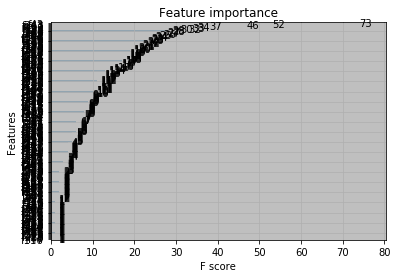

In [246]:
model = XGBoostClassifier()
model.fit(dataArray, train['airline_sentiment'])
plot_importance(model)
pyplot.show()